In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import manifold
from time import time
from sklearn.decomposition import PCA,KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets.samples_generator import make_classification
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib.font_manager import FontProperties #字体管理器
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)
%matplotlib inline

In [3]:
bug = pd.read_csv(r"F:\post graduate\dataset\buglist.csv",encoding='latin-1')
assignee = bug['Assignee']
classification = bug['Classification']
product = bug['Product']
component = bug['Component']
label = list(sorted(set(assignee)))

classification_num = len(set(classification))
product_num = len(set(product))
component_num = len(set(component))
total_num = classification_num+product_num+component_num

total_feature = list(sorted(set(classification) | set(product) | set(component)))
matrix = np.zeros((len(label),len(total_feature)),dtype=np.int32)
for i in range(len(assignee)):
    index_1 = label.index(assignee[i])
    index_2 = total_feature.index(classification[i])
    index_3 = total_feature.index(product[i])
    index_4 = total_feature.index(component[i])
    matrix[index_1][index_2] +=1
    matrix[index_1][index_3] +=1
    matrix[index_1][index_4] +=1

In [4]:
label

['AJDT-inbox',
 'Aaron Ferguson',
 'Aashima Goel',
 'Abdullah Alarakhia',
 'Abner Ballardo',
 'Adam Archer',
 'Adam Kiezun',
 'Adam Peller',
 'Adam Schlegel',
 'Adolfo Sanchez-Barbudo Herrera',
 'Adrian Colyer',
 'Adrian Skehill',
 'Adriana Viman',
 'Aidyl Kareh',
 'Aitor Bediaga',
 'Al B',
 'Alain Magloire',
 'Alan Haggarty',
 'Alasdair McDowell',
 'Alex Bernstein',
 'Alex Blewitt',
 'Alex Boisvert',
 'Alex Boyko',
 'Alex Chapiro',
 'Alex Iskold',
 'Alex LC Liang',
 'Alex Nan',
 'Alex Panchenko',
 'Alex Shatalin',
 'Alex Smirnoff',
 'Alex Vainchtein',
 'Alexander Fedorov',
 'Alexander Gurov',
 'Alexander Igdalov',
 'Alexander Kurtakov',
 'Alexander N. Alexeev',
 'Alexander NyÃ\x9fen',
 'Alexander Pehm',
 'Alexandre Vasseur',
 'Allan Godding',
 'Allan Pratt',
 'Allen C Wong',
 'Alon Peled',
 'Alphonse Van Assche',
 'Amy Wu',
 'Ana Pereira',
 'Anandi Krishnamurthy',
 'Andre Weinand',
 'Andrea',
 'Andreas Werner',
 'Andrei Sobolev',
 'Andrew Clement',
 'Andrew Eberbach',
 'Andrew Eidsnes

In [5]:
print(total_feature[:10])
print(len(total_feature))

['AJBrowser', 'AJDT', 'AJDoc', 'ALF', 'AM3(deprecated)', 'AMW', 'API Tools', 'APT', 'ATF', 'Ant']
393


In [8]:
y = np.asarray(list(range(len(matrix))))
print(matrix.shape)
print(y.shape)
color = np.random.rand(len(matrix))

(1455, 393)
(1455,)


[0.45484414 0.10324251 0.0756293  0.05225381 0.04016409 0.03566178
 0.03241593 0.02858014 0.02528553 0.01930513 0.01670679 0.01660681]
累计方差占比：0.900696
[[-2.98779691e+01  2.38847486e+01  2.42210830e+01 -1.36907917e+01
   1.22548400e+01 -2.41462440e+01 -1.25501713e+01  5.18693002e+01
  -9.83226739e-01 -2.36960760e+01  3.96347435e-01 -8.85067508e+00]
 [-2.03250297e+01 -4.77892525e+00  1.09937572e+01 -9.88552685e+00
  -3.39784476e+00 -1.24948667e+01  4.50195756e+00 -1.12370129e+01
  -4.31933381e+00 -4.30887740e+00 -5.83043573e+00 -4.47215934e+00]
 [-4.73898940e+01  3.33276008e+00 -2.10463413e-02 -4.01218414e+00
  -3.62830043e+00 -1.22706426e+01  5.90296841e+00 -1.09851000e+01
  -9.56906650e-01  1.13615302e+00 -5.39585316e+00 -4.89954244e+00]
 [-4.82403702e+01  3.46353202e+00 -6.90909478e-02 -1.58741637e+01
  -1.37575264e+01  5.21369923e+01 -3.00011916e+00 -4.38499105e-01
  -5.01539405e-01  1.13969080e+00 -3.70553408e+00 -4.33543685e+00]
 [-4.73053667e+01  3.28432591e+00 -1.99226489e-02 -1.

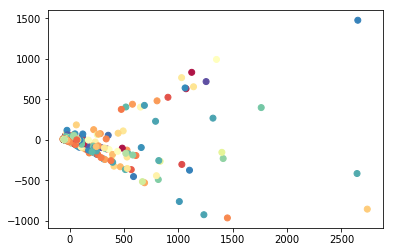

In [38]:
#线性pca降维
pca = PCA(n_components=0.90)   #降到n维
pca.fit(matrix)             #训练
pca_matrix=pca.fit_transform(matrix) #降维后的数据 sum(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_) #各个主成分的方差值占比
print("累计方差占比：%f"%(sum(pca.explained_variance_ratio_)))
print(pca_matrix[:10])
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=color, cmap=plt.cm.Spectral)

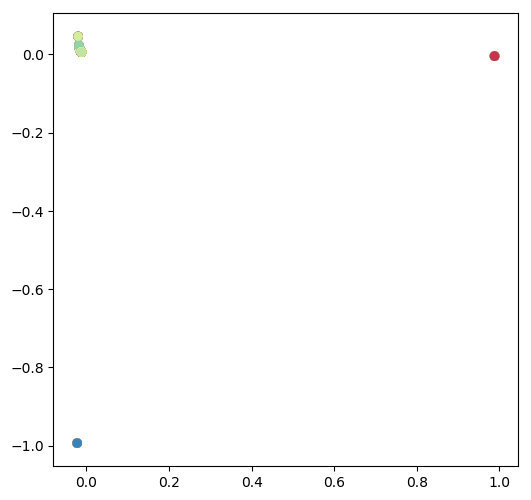

In [167]:
#非线性核pca降维
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
kpca_matrix = kpca.fit_transform(matrix)
plt.figure(figsize=(6,6),dpi=100)
plt.scatter(kpca_matrix[:, 0], kpca_matrix[:, 1], c=color, cmap=plt.cm.Spectral)

In [168]:
#t-SNE 2D
tsne = TSNE(n_components=2,init='pca', random_state=0,method='exact')
tsne_matrix_2d = tsne.fit_transform(matrix)


1455


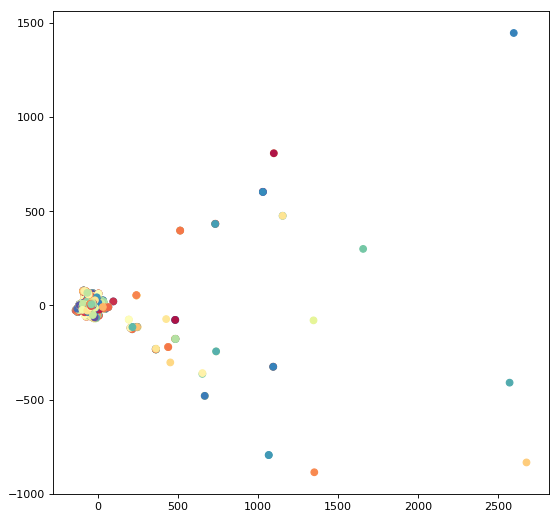

In [169]:
print(len(tsne_matrix_2d))
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(111)
plt.scatter(tsne_matrix_2d[:, 0], tsne_matrix_2d[:, 1], c=color, cmap=plt.cm.Spectral)
plt.show()

In [21]:
#t-SNE 3D
from mpl_toolkits.mplot3d import Axes3D
tsne_matrix_3d = TSNE(n_components=3,init='pca', random_state=0).fit_transform(matrix)

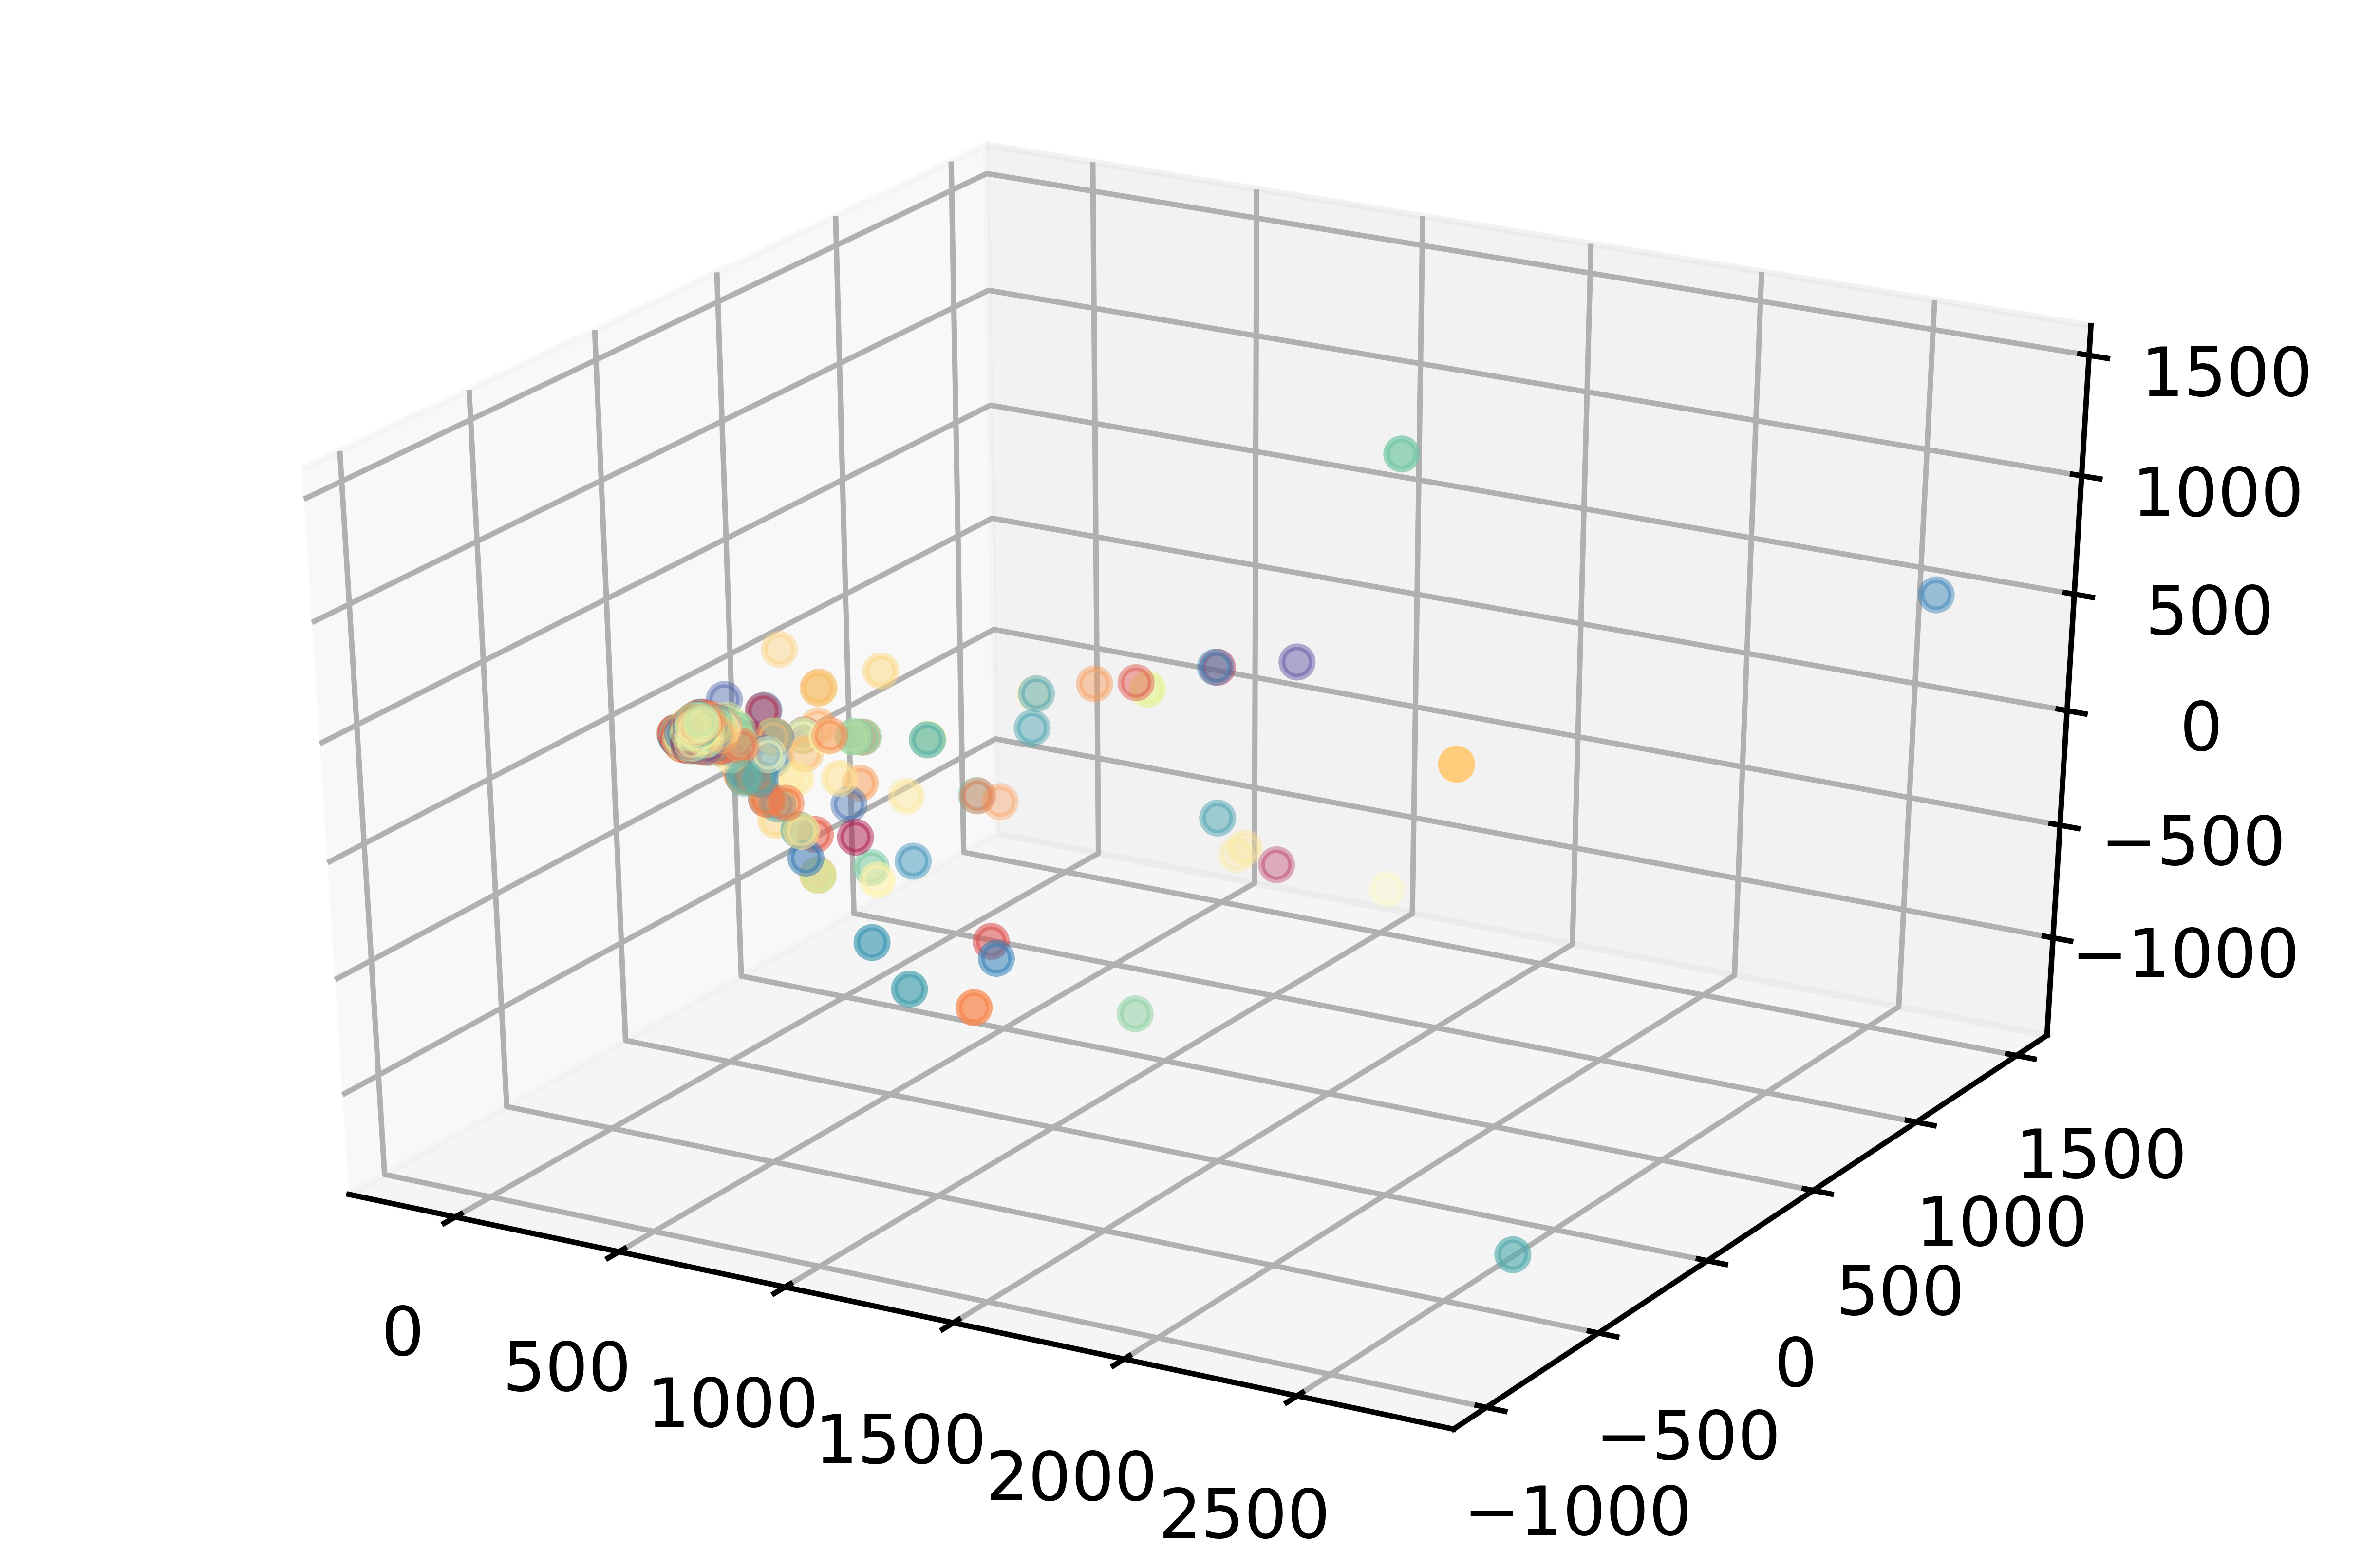

In [30]:
plt.figure(dpi=1000)
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
ax.scatter(tsne_matrix_3d[:,0], tsne_matrix_3d[:,1],tsne_matrix_3d[:,2], c=color,cmap=plt.cm.Spectral)

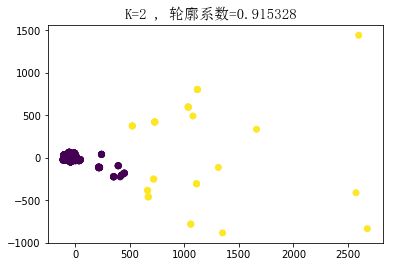

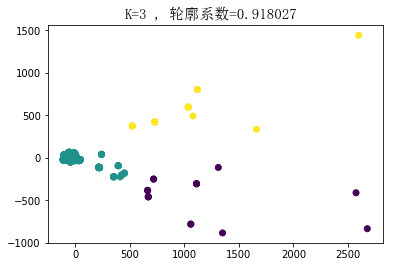

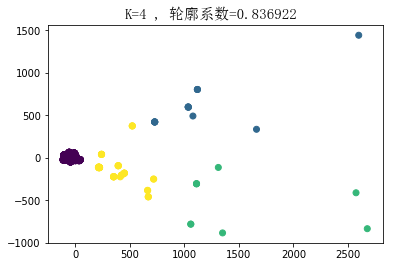

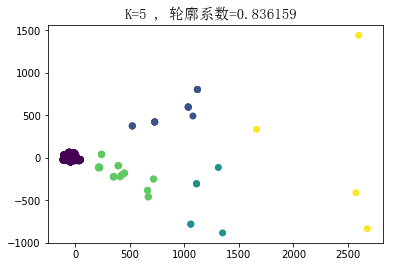

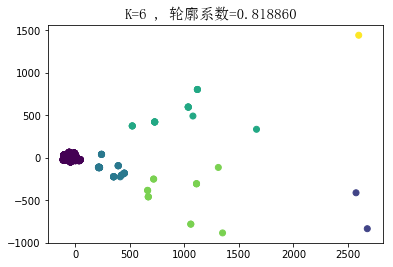

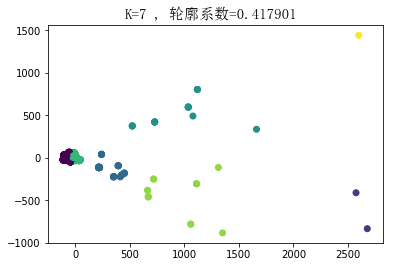

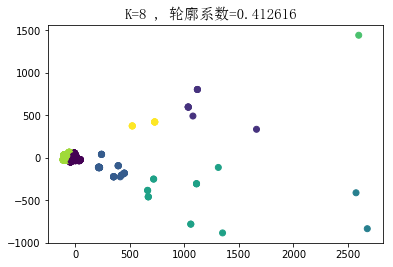

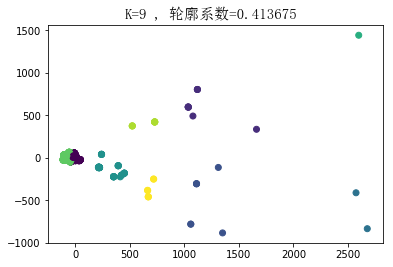

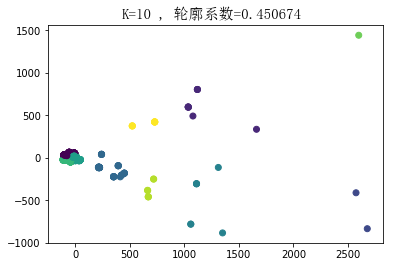

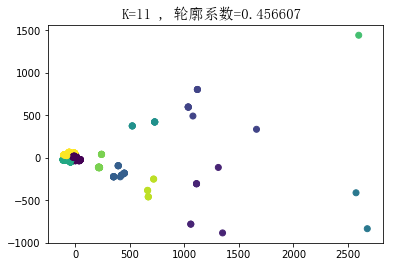

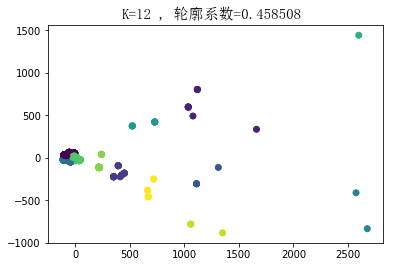

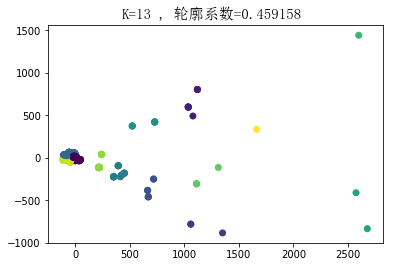

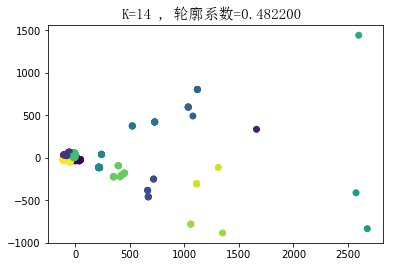

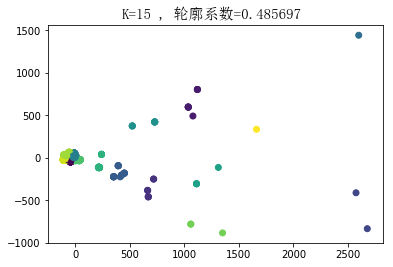

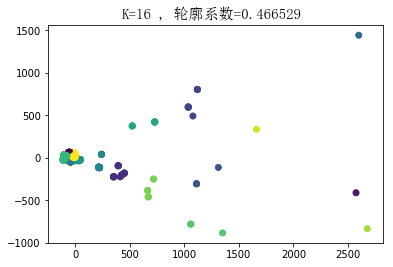

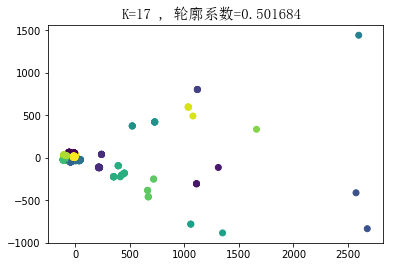

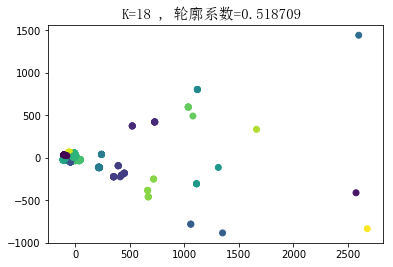

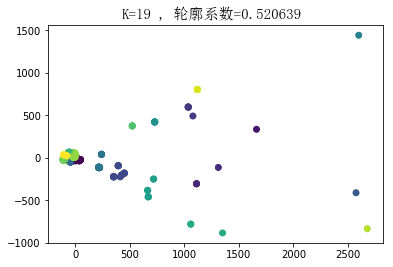

In [142]:
from sklearn import metrics           #K的评估标准
meandistortions = []                  #平均畸变程度 样本到其最近聚类中心的平方距离之和/样本总数
sc = []                              #轮廓系数
for i in range(2,20):
    kmeans_model = KMeans(n_clusters=i)   #生成聚类容器
    kmeans_model.fit(tsne_matrix_2d)      #聚类
    pred = kmeans_model.labels_           #获取聚类标签
    sc.append(metrics.silhouette_score(tsne_matrix_2d,pred))
    plt.scatter(tsne_matrix_2d[:, 0], tsne_matrix_2d[:, 1], c=pred)
    plt.title('K=%d , 轮廓系数=%f '%(i,sc[-1]),fontproperties=font)
#     plt.savefig(r'C:\Users\Snake\Desktop\clustering\%d.png'%i)
    plt.show()

In [144]:
kmeans_model = KMeans(n_clusters=3)   #生成聚类容器
kmeans_model.fit(tsne_matrix_3d)      #聚类
pred = kmeans_model.labels_           #获取聚类标签

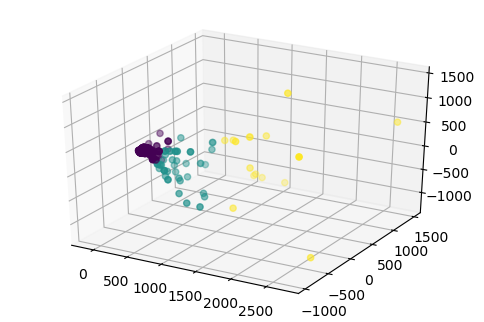

In [148]:
plt.figure(dpi=100)
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
ax.scatter(tsne_matrix_3d[:,0], tsne_matrix_3d[:,1],tsne_matrix_3d[:,2], c=pred)

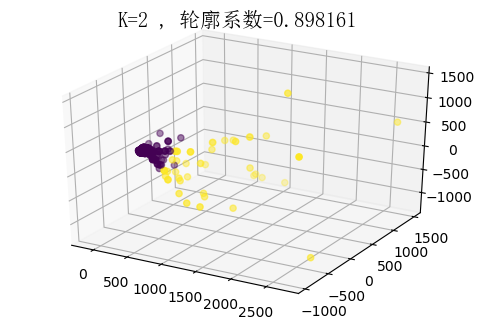

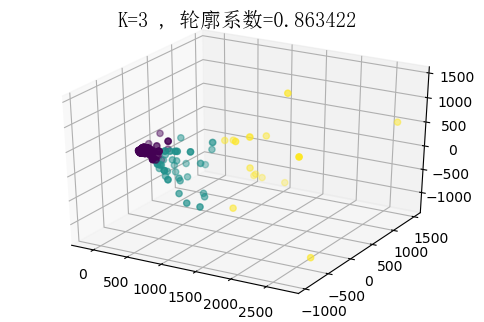

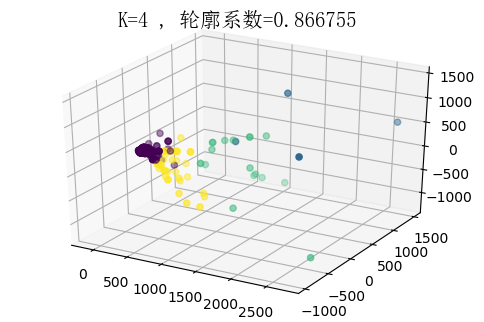

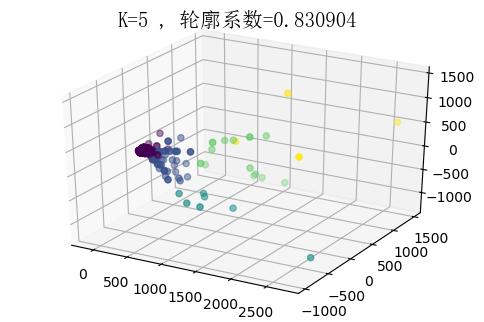

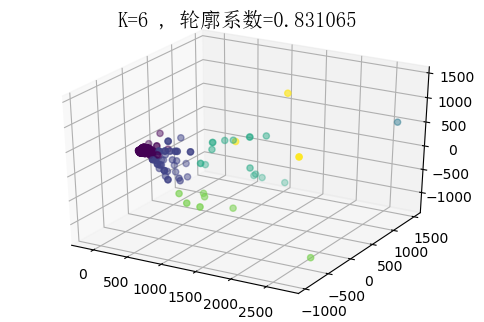

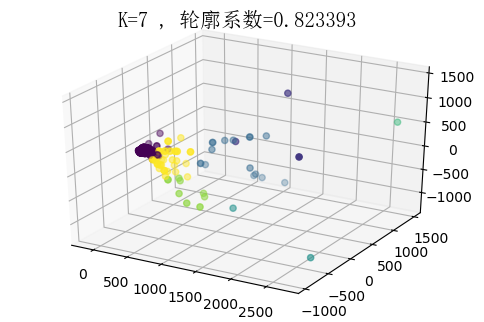

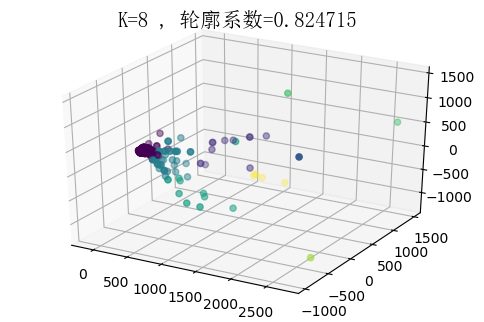

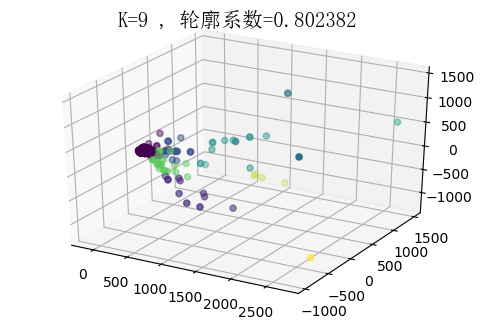

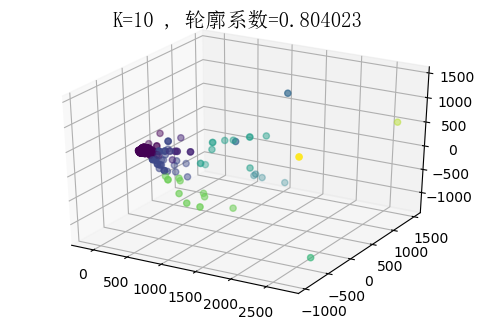

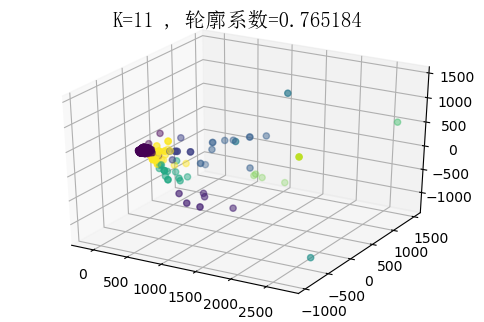

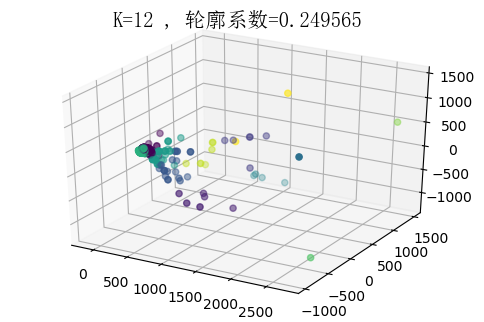

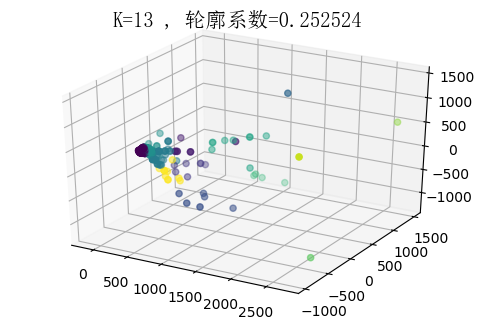

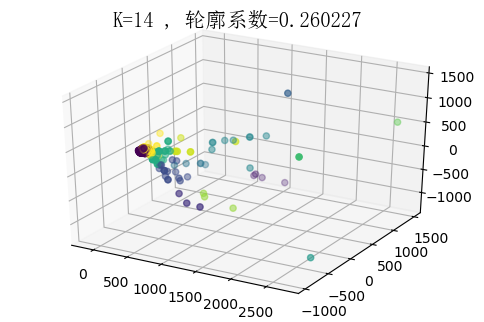

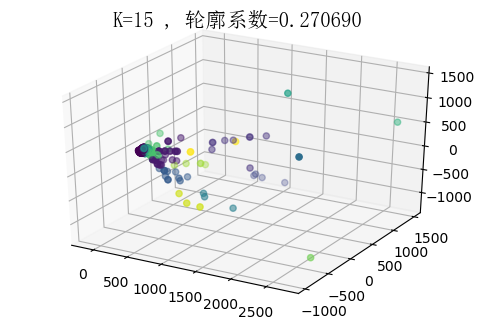

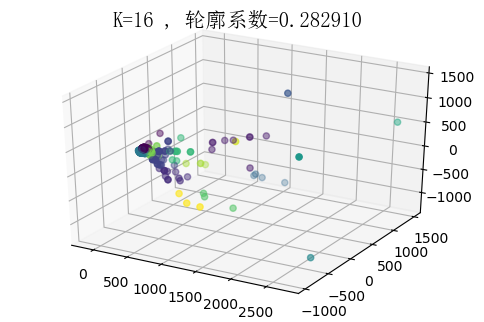

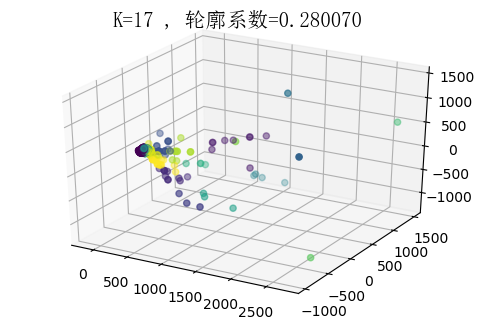

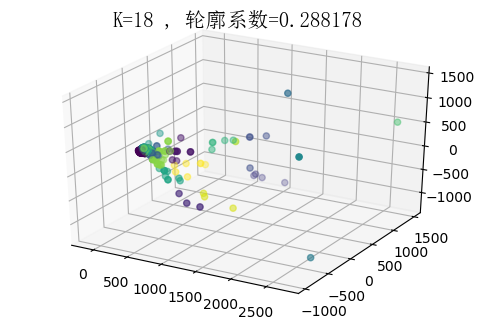

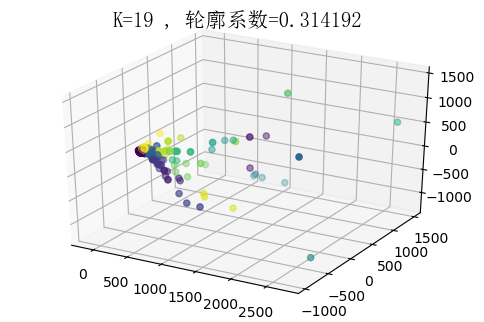

In [156]:
sc = []                              #轮廓系数
for i in range(2,20):
    kmeans_model = KMeans(n_clusters=i)   #生成聚类容器
    kmeans_model.fit(tsne_matrix_3d)      #聚类
    pred = kmeans_model.labels_           #获取聚类标签
    sc.append(metrics.silhouette_score(tsne_matrix_3d,pred))
    plt.figure(dpi=100)
    ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
    ax.scatter(tsne_matrix_3d[:,0], tsne_matrix_3d[:,1],tsne_matrix_3d[:,2], c=pred)
    plt.title('K=%d , 轮廓系数=%f '%(i,sc[-1]),fontproperties=font)
    plt.savefig(r'C:\Users\Snake\Desktop\clustering\%d.png'%i)
    plt.show()